In [9]:
import deepxde as dde
from deepxde.backend import tf
import numpy as np
import matplotlib.pyplot as plt


coefficents

In [10]:
k=0.4
L=1
n=1

Geometery

In [11]:
geom=dde.geometry.Interval(0,L)
timedomain=dde.geometry.TimeDomain(0,n)
geomtime=dde.geometry.GeometryXTime(geom,timedomain)


IC and BC

In [17]:
ic=dde.icbc.IC(geomtime, lambda x: np.sin(n* np.pi * x[:,0:1]/L), lambda _, on_initial: on_initial)#n is the time domain

example of lambda

In [18]:
input_array=np.array([[1,2,3],
                      [4,5,6],
                      [7,8,9]])
lambda_function=lambda x:2*x[:,0:1]
print(lambda_function(input_array))

[[ 2]
 [ 8]
 [14]]


In [19]:
def double_first_column(input_array):
    print("input_array",input_array)
    print("input array.shape",input_array[:,0:1].shape)
    print("input array[:,0]",input_array[:,0])
    print("input array[:,0].shape",input_array[:,0].shape)
    return 2*input_array[:,0:1]


bc=dde.icbc.DirichletBC(
    geomtime,
    lambda input_array:double_first_column(input_array),
    lambda _,
    on_boundary:on_boundary
)


In [20]:
def pde(comp,u):
    du_t=dde.grad.jacobian(u,comp,i=0,j=1)# i is u ,,,j=1 is t
    du_xx=dde.grad.hessian(u,comp,i=0,j=0)#j=1 is t
    return du_t-k*du_xx

In [21]:
data=dde.data.TimePDE(geomtime,pde,[bc,ic],num_domain=2540,num_boundary=80,num_initial=160, num_test=2540)

createing network itself

In [27]:
net=dde.nn.FNN([2]+[20]*3+[1],"tanh","Glorot normal") #mean is always is zero

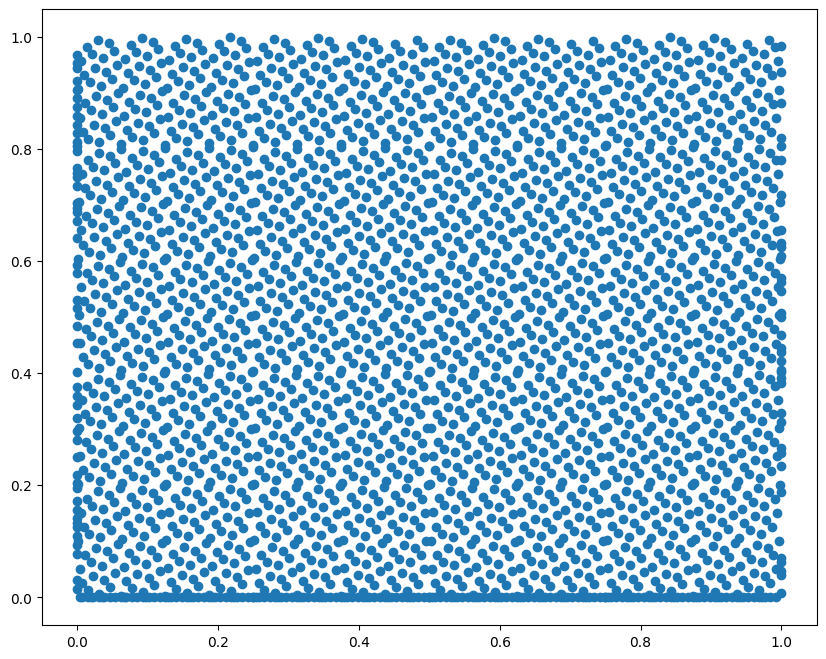

In [28]:
plt.figure(figsize=(10,8))
plt.scatter(data.train_x_all[:,0],data.train_x_all[:,1])

In [29]:
model=dde.Model(data,net)

In [32]:
model.compile("adam",lr=1e-3)

Compiling model...
input_array [[0.        0.484375 ]
 [1.        0.5      ]
 [0.        0.15625  ]
 [0.        0.6953125]
 [1.        0.0625   ]
 [0.        0.90625  ]
 [0.        0.296875 ]
 [0.        0.171875 ]
 [0.        0.828125 ]
 [0.        0.578125 ]
 [1.        0.4453125]
 [0.        0.8125   ]
 [0.        0.765625 ]
 [1.        0.390625 ]
 [0.        0.359375 ]
 [1.        0.609375 ]
 [1.        0.0390625]
 [0.        0.875    ]
 [1.        0.265625 ]
 [1.        0.4375   ]
 [0.        0.640625 ]
 [0.        0.3203125]
 [1.        0.421875 ]
 [0.        0.7578125]
 [0.        0.109375 ]
 [1.        0.046875 ]
 [0.        0.515625 ]
 [0.        0.1953125]
 [1.        0.78125  ]
 [0.        0.21875  ]
 [1.        0.234375 ]
 [0.        0.1328125]
 [1.        0.71875  ]
 [1.        0.8203125]
 [1.        0.46875  ]
 [1.        0.5703125]
 [0.        0.890625 ]
 [0.        0.671875 ]
 [0.        0.03125  ]
 [0.        0.953125 ]
 [0.        0.703125 ]
 [1.        0.0703125]
 [0

In [35]:
losshistory,train_state=model.train(iterations=15000)

Training model...

Step      Train loss                        Test loss                         Test metric
1000      [8.69e-03, 6.37e-02, 9.89e-02]    [5.47e-03, 6.37e-02, 9.89e-02]    []  
2000      [1.25e-02, 5.19e-02, 3.19e-02]    [9.30e-03, 5.19e-02, 3.19e-02]    []  
3000      [3.72e-03, 3.57e-02, 2.64e-02]    [2.29e-03, 3.57e-02, 2.64e-02]    []  
4000      [3.44e-03, 2.68e-02, 1.94e-02]    [2.26e-03, 2.68e-02, 1.94e-02]    []  
5000      [3.20e-03, 2.09e-02, 1.44e-02]    [2.53e-03, 2.09e-02, 1.44e-02]    []  
6000      [2.74e-03, 1.79e-02, 1.17e-02]    [2.21e-03, 1.79e-02, 1.17e-02]    []  
7000      [2.36e-03, 1.65e-02, 1.01e-02]    [1.90e-03, 1.65e-02, 1.01e-02]    []  
8000      [1.98e-03, 1.56e-02, 9.07e-03]    [1.52e-03, 1.56e-02, 9.07e-03]    []  
9000      [1.71e-03, 1.52e-02, 8.11e-03]    [1.27e-03, 1.52e-02, 8.11e-03]    []  
10000     [1.59e-03, 1.42e-02, 7.73e-03]    [1.12e-03, 1.42e-02, 7.73e-03]    []  
11000     [1.55e-03, 1.37e-02, 7.28e-03]    [1.11e-03, 1.37e-

make it more accurate

In [36]:
model.compile("L-BFGS-B")
losshistory,train_state=model.train()

Compiling model...
input_array [[0.        0.484375 ]
 [1.        0.5      ]
 [0.        0.15625  ]
 [0.        0.6953125]
 [1.        0.0625   ]
 [0.        0.90625  ]
 [0.        0.296875 ]
 [0.        0.171875 ]
 [0.        0.828125 ]
 [0.        0.578125 ]
 [1.        0.4453125]
 [0.        0.8125   ]
 [0.        0.765625 ]
 [1.        0.390625 ]
 [0.        0.359375 ]
 [1.        0.609375 ]
 [1.        0.0390625]
 [0.        0.875    ]
 [1.        0.265625 ]
 [1.        0.4375   ]
 [0.        0.640625 ]
 [0.        0.3203125]
 [1.        0.421875 ]
 [0.        0.7578125]
 [0.        0.109375 ]
 [1.        0.046875 ]
 [0.        0.515625 ]
 [0.        0.1953125]
 [1.        0.78125  ]
 [0.        0.21875  ]
 [1.        0.234375 ]
 [0.        0.1328125]
 [1.        0.71875  ]
 [1.        0.8203125]
 [1.        0.46875  ]
 [1.        0.5703125]
 [0.        0.890625 ]
 [0.        0.671875 ]
 [0.        0.03125  ]
 [0.        0.953125 ]
 [0.        0.703125 ]
 [1.        0.0703125]
 [0

Saving loss history to c:\Users\rgh51\Desktop\loss.dat ...
Saving training data to c:\Users\rgh51\Desktop\train.dat ...
Saving test data to c:\Users\rgh51\Desktop\test.dat ...


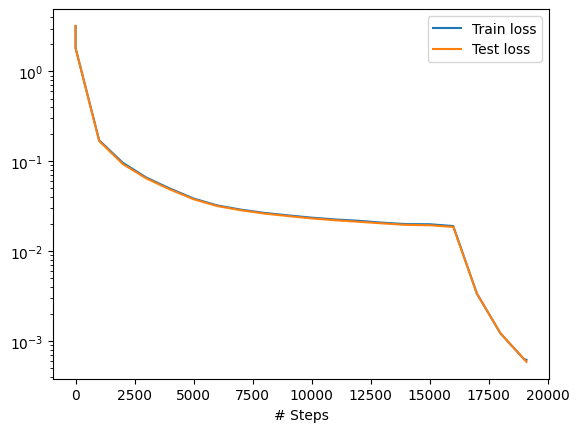

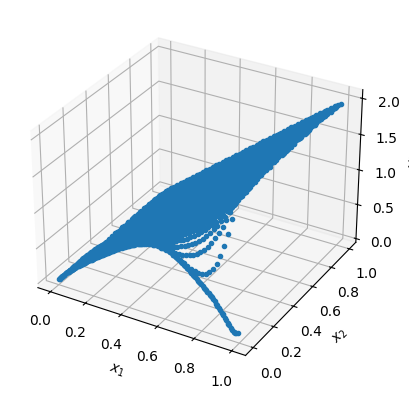

In [37]:
dde.saveplot(losshistory,train_state,issave=True)